# Crime in pindostan(full dataset feature selection)

The project is based on [this](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) UCI dataset. My goal was to predict the rate of violent and nonviolent crimes per population and to find out what features have the greatest influence on the target variables. This project contains two parts, dedicated to [manual](insert github link here) and automatic feature selection(this part). In this notebook I try to predict the rate of violent and nonviolent crimes and test out 4 different feature selecting algorithms.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('crimedata.csv', encoding = 'latin-1')
data.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [4]:
data.replace('?', np.nan, inplace = True)

In [5]:
for col in data.columns[2:]:
    if data[col].dtype == np.object:
       data[col] = data[col].astype('float64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [7]:
data.dropna(subset = ['nonViolPerPop', 'ViolentCrimesPerPop'], inplace = True)

In [8]:
target_nonv = data['nonViolPerPop']
target_viol = data['ViolentCrimesPerPop']

In [9]:
community_name = data['Êcommunityname']
state = data['state']
county_code = data['countyCode']
community_code = data['communityCode']
fold = data['fold']

In [10]:
data.drop(columns = ['Êcommunityname', 'state', 'countyCode', 'communityCode', 'fold', 'nonViolPerPop', 'ViolentCrimesPerPop'], inplace = True)

In [11]:
for col in data.columns:
    data[col] = data[col].fillna(np.mean(data[col]))

In [12]:
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87
5,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,449.0,297.29,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.0,88.72
6,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,...,54.0,182.66,110.0,372.09,288.0,974.19,144.0,487.10,17.0,57.50


In [13]:
X = data.drop(columns = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop'])
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,118.533113,6.5,1845.9,9.63,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,118.533113,10.6,2186.7,3.84,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,118.533113,10.6,2780.9,4.37,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
5,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,118.533113,70.4,1995.7,0.97,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
6,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,...,118.533113,10.9,2643.5,9.62,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152


In [14]:
X.tail()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
2210,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,8.08,...,118.533113,16.7,3365.4,0.59,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
2211,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,12.57,...,118.533113,7.3,1682.8,1.15,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
2212,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,20.73,...,118.533113,27.5,1195.2,0.12,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
2213,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,10.42,...,118.533113,6.3,2142.2,0.00,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152
2214,28898,2.61,2.39,71.27,9.09,24.43,12.99,25.21,11.63,12.12,...,118.533113,21.7,1331.0,1.39,178.05298,2.939703e+07,86.886026,4.453642,0.0,157042.042152


In [15]:
RANDOM_STATE = 42

Parameter tuning of Lasso and RandomForestRegressor on manually selected features yielded the following results. 
<br>*Violent crimes:*
* **Lasso:** MAE_test = 259.94365824914854 
* **RF:** MAE_test = 236.5259341134638. 
<br>

*Nonviolent crimes:*
* **Lasso:** MAE_test = 1400.6183591755841 
* **RF:** MAE_test = 1305.806011085814.
<br>

I beleive that feature selection may lead to a better performance so I tried 4 different ways of feature selection and applied them to the whole dataset. The algorithms I chose for feature selection are:
* [VarianceThreshold](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold)
* [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)
* [SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)
* [SequentialFeatureSelector](https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/).

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
def evaluate(X_train, X_test, y_train, y_test, regressor):
    regressor.fit(X_train, y_train)
    MAE_train = mean_absolute_error(y_train, regressor.predict(X_train))
    MAE_test = mean_absolute_error(y_test, regressor.predict(X_test))
    return(MAE_train, MAE_test)

In [19]:
def cv_evaluate(X, y, regressor):
    return(cross_val_score(regressor, X, y, scoring = 'neg_mean_absolute_error', n_jobs = -1).mean())

In [20]:
def print_result(result):
    print('MAE_train: ', result[0])
    print('MAE_test: ', result[1])

In [21]:
def print_cv_result(result):
    print('cross validation MAE: ', result)

In [22]:
def get_features(values, names, threshold):
   for value, name in zip(values, names):
        if value > threshold:
            yield(name)

In [24]:
def get_common(x, y):
    return list(set(x)&set(y))

In [25]:
X_train, X_test, target_nonv_train, target_nonv_test, target_viol_train, target_viol_test = train_test_split(X, target_nonv, target_viol, test_size = 0.3, random_state = RANDOM_STATE)

In [26]:
pipe_lasso = make_pipeline(StandardScaler(), Lasso(random_state = RANDOM_STATE))
pipe_rf = make_pipeline(StandardScaler(), RandomForestRegressor(random_state = RANDOM_STATE))

In [27]:
lasso = Lasso(random_state = RANDOM_STATE)
rf = RandomForestRegressor(random_state = RANDOM_STATE)

Let's take a look at how the models perform on full dataset without any parameter tuning or feature selection.

### a. Violent crimes

In [28]:
default_lasso_viol = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_lasso)
print_result(default_lasso_viol)

MAE_train:  229.62860330472793
MAE_test:  244.58862097075067


In [29]:
default_cv_lasso_viol = cv_evaluate(X, target_viol, pipe_lasso)
print_cv_result(default_cv_lasso_viol)

cross validation MAE:  -246.47557955182592


In [30]:
default_rf_viol = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_rf)
print_result(default_rf_viol)

MAE_train:  97.50075957926371
MAE_test:  256.7365621716287


In [31]:
default_cv_rf_viol = cv_evaluate(X, target_viol, pipe_rf)
print_cv_result(default_cv_rf_viol)

cross validation MAE:  -250.954610935857


### b. Nonviolent crimes

In [32]:
default_lasso_nonv = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_lasso)
print_result(default_lasso_nonv)

MAE_train:  1190.8119725973834
MAE_test:  1345.0597909403812


In [33]:
default_cv_lasso_nonv = cv_evaluate(X, target_nonv, pipe_lasso)
print_cv_result(default_cv_lasso_nonv)

cross validation MAE:  -1353.4573286815373


In [34]:
default_rf_nonv = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_rf)
print_result(default_rf_nonv)

MAE_train:  544.1303891810669
MAE_test:  1451.7389649737304


In [35]:
default_cv_rf_nonv = cv_evaluate(X, target_nonv, pipe_rf)
print_cv_result(default_cv_rf_nonv)

cross validation MAE:  -1337.7898848580442


Default Lasso performs better on full dataset than on manually selected features with grid search parameter tuning.

## 1. Variance threshold

This algorithm is based on the statistical variance analysis(the lower the variance, the less informative is the feature) and it removes all features with variance below a certain threshold. In the next cell I scale the features to fit the standard normal distribution($ N(0,1) $) and realize that maybe applying StandardScaler in order to use VarianceThreshold later ain't the smartest idea.

In [36]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
np.var(X_norm, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

Yeah, let's try MinMaxScaler instead.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)
np.var(X_minmax, axis = 0)

array([0.00079367, 0.00890631, 0.02085463, 0.02850052, 0.00680784,
       0.02633067, 0.00812543, 0.01012441, 0.00996158, 0.00901415,
       0.00079905, 0.19588697, 0.01485516, 0.0145872 , 0.01112974,
       0.02558297, 0.01328635, 0.0288152 , 0.01186726, 0.01496154,
       0.01172303, 0.01012886, 0.00195133, 0.00104437, 0.00821575,
       0.003467  , 0.01116282, 0.00077592, 0.03094508, 0.01921831,
       0.02394677, 0.03034219, 0.01447165, 0.01829257, 0.02843845,
       0.01519943, 0.02231608, 0.02534036, 0.0275093 , 0.01565969,
       0.02668432, 0.03430703, 0.01151261, 0.02821697, 0.03182345,
       0.0273195 , 0.02372713, 0.01547882, 0.01912641, 0.00073158,
       0.01601591, 0.00078509, 0.02270941, 0.02594677, 0.03062603,
       0.03336428, 0.01480503, 0.01671993, 0.01845212, 0.01864901,
       0.02527158, 0.01351662, 0.01385362, 0.01220012, 0.01246458,
       0.0116533 , 0.01619347, 0.02935007, 0.01000925, 0.02340163,
       0.03011127, 0.0011831 , 0.00737689, 0.03080548, 0.00748

In [39]:
pipe_varth_lasso_0 = make_pipeline(MinMaxScaler(), VarianceThreshold(0.01), Lasso(random_state = RANDOM_STATE))
pipe_varth_lasso_1 = make_pipeline(MinMaxScaler(), VarianceThreshold(0.02), Lasso(random_state = RANDOM_STATE))
pipe_varth_lasso_2 = make_pipeline(MinMaxScaler(), VarianceThreshold(0.03), Lasso(random_state = RANDOM_STATE))
pipe_varth_rf_0 = make_pipeline(MinMaxScaler(), VarianceThreshold(0.01), RandomForestRegressor(random_state = RANDOM_STATE))
pipe_varth_rf_1 = make_pipeline(MinMaxScaler(), VarianceThreshold(0.02), RandomForestRegressor(random_state = RANDOM_STATE))
pipe_varth_rf_2 = make_pipeline(MinMaxScaler(), VarianceThreshold(0.03), RandomForestRegressor(random_state = RANDOM_STATE))

### 1.a. Violent crimes

In [40]:
varth_lasso_viol_0 = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_varth_lasso_0)
print_result(varth_lasso_viol_0)

MAE_train:  243.99827356157417
MAE_test:  241.82386789385012


In [41]:
varth_cv_lasso_viol_0 = cv_evaluate(X, target_viol, pipe_varth_lasso_0)
print_cv_result(varth_cv_lasso_viol_0)

cross validation MAE:  -244.8191588930797


In [42]:
varth_lasso_viol_1 = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_varth_lasso_1)
print_result(varth_lasso_viol_1)

MAE_train:  254.98219051949994
MAE_test:  248.5425744982677


In [43]:
varth_cv_lasso_viol_1 = cv_evaluate(X, target_viol, pipe_varth_lasso_1)
print_cv_result(varth_cv_lasso_viol_1)

cross validation MAE:  -254.07370109051553


In [44]:
varth_lasso_viol_2 = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_varth_lasso_2)
print_result(varth_lasso_viol_2)

MAE_train:  273.94392207560367
MAE_test:  264.1723526383231


In [45]:
varth_cv_lasso_viol_2 = cv_evaluate(X, target_viol, pipe_varth_lasso_2)
print_cv_result(varth_cv_lasso_viol_2)

cross validation MAE:  -264.75321337612763


In [46]:
varth_rf_viol_0 = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_varth_rf_0)
print_result(varth_rf_viol_0)

MAE_train:  97.11451314800901
MAE_test:  250.9628861646235


In [47]:
varth_cv_rf_viol_0 = cv_evaluate(X, target_viol, pipe_varth_rf_0)
print_cv_result(varth_cv_rf_viol_0)

cross validation MAE:  -253.15047423764454


In [48]:
varth_rf_viol_1 = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_varth_rf_1)
print_result(varth_rf_viol_1)

MAE_train:  101.30151840721263
MAE_test:  241.7972364273205


In [49]:
varth_cv_rf_viol_1 = cv_evaluate(X, target_viol, pipe_varth_rf_1)
print_cv_result(varth_cv_rf_viol_1)

cross validation MAE:  -251.6202287066246


In [50]:
varth_rf_viol_2 = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_varth_rf_2)
print_result(varth_rf_viol_2)

MAE_train:  106.35753193087903
MAE_test:  249.87534500875654


In [51]:
varth_cv_rf_viol_2 = cv_evaluate(X, target_viol, pipe_varth_rf_2)
print_cv_result(varth_cv_rf_viol_2)

cross validation MAE:  -261.9007996845426


### 1.b. Nonviolent crimes

In [52]:
varth_lasso_nonv_0 = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_varth_lasso_0)
print_result(varth_lasso_nonv_0)

MAE_train:  1236.020950029258
MAE_test:  1318.4578550458173


In [53]:
varth_cv_lasso_nonv_0 = cv_evaluate(X, target_nonv, pipe_varth_lasso_0)
print_cv_result(varth_cv_lasso_nonv_0)

cross validation MAE:  -1311.43027817035


In [54]:
varth_lasso_nonv_1 = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_varth_lasso_1)
print_result(varth_lasso_nonv_1)

MAE_train:  1279.6934572337514
MAE_test:  1349.7662058926544


In [55]:
varth_cv_lasso_nonv_1 = cv_evaluate(X, target_nonv, pipe_varth_lasso_1)
print_cv_result(varth_cv_lasso_nonv_1)

cross validation MAE:  -1333.8694445487172


In [56]:
varth_lasso_nonv_2 = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_varth_lasso_2)
print_result(varth_lasso_nonv_2)

MAE_train:  1299.0476438332814
MAE_test:  1339.0207040220976


In [57]:
varth_cv_lasso_nonv_2 = cv_evaluate(X, target_nonv, pipe_varth_lasso_2)
print_cv_result(varth_cv_lasso_nonv_2)

cross validation MAE:  -1334.9277698745411


In [58]:
varth_rf_nonv_0 = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_varth_rf_0)
print_result(varth_rf_nonv_0)

MAE_train:  560.2956183320812
MAE_test:  1444.3168896672507


In [59]:
varth_cv_rf_nonv_0 = cv_evaluate(X, target_nonv, pipe_varth_rf_0)
print_cv_result(varth_cv_rf_nonv_0)

cross validation MAE:  -1372.7908343848583


In [60]:
varth_rf_nonv_1 = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_varth_rf_1)
print_result(varth_rf_nonv_1)

MAE_train:  544.6961555221638
MAE_test:  1428.7283537653243


In [61]:
varth_cv_rf_nonv_1 = cv_evaluate(X, target_nonv, pipe_varth_rf_1)
print_cv_result(varth_cv_rf_nonv_1)

cross validation MAE:  -1385.0276356466877


In [62]:
varth_rf_nonv_2 = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_varth_rf_2)
print_result(varth_rf_nonv_2)

MAE_train:  566.3268933132982
MAE_test:  1479.6272539404554


In [63]:
varth_cv_rf_nonv_2 = cv_evaluate(X, target_nonv, pipe_varth_rf_2)
print_cv_result(varth_cv_rf_nonv_2)

cross validation MAE:  -1378.7649626708728


### 1.c. Selected feature comparison

Let's see how many features are selected by each value of the variance threshold.

In [69]:
varth_0 = VarianceThreshold(0.01)
varth_1 = VarianceThreshold(0.02)
varth_2 = VarianceThreshold(0.03)

In [65]:
X_v_0 = varth_0.fit_transform(X_minmax)
X_v_0.shape

(1902, 79)

In [66]:
X_v_1 = varth_1.fit_transform(X_minmax)
X_v_1.shape

(1902, 45)

In [67]:
X_v_2 = varth_2.fit_transform(X_minmax)
X_v_2.shape

(1902, 18)

In [68]:
X_minmax.shape

(1902, 124)

So far the best performance is obtained by Lasso with variance threshold of 0.01. The scores of RandomForestRegressor dropped.

## 2. Select k best

This is another statistical method that removes all but the k highest scoring features. The scoring metric for regression tasks is f-regression, so let's select 15, 25 and 35 features with the best f-regression scores.

In [70]:
pipe_15_best_lasso = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = 15), Lasso(random_state = RANDOM_STATE))
pipe_25_best_lasso = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = 25), Lasso(random_state = RANDOM_STATE))
pipe_35_best_lasso = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = 35), Lasso(random_state = RANDOM_STATE))
pipe_15_best_rf = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = 15), RandomForestRegressor(random_state = RANDOM_STATE))
pipe_25_best_rf = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = 25), RandomForestRegressor(random_state = RANDOM_STATE))
pipe_35_best_rf = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = 35), RandomForestRegressor(random_state = RANDOM_STATE))

### 2.a. Violent crimes

In [71]:
lasso_viol_15_best = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_15_best_lasso)
print_result(lasso_viol_15_best)

MAE_train:  252.3952689373819
MAE_test:  255.51379184921447


In [72]:
cv_lasso_viol_15_best = cv_evaluate(X, target_viol, pipe_15_best_lasso)
print_cv_result(cv_lasso_viol_15_best)

cross validation MAE:  -254.28419978266984


In [73]:
lasso_viol_25_best = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_25_best_lasso)
print_result(lasso_viol_25_best)

MAE_train:  248.4711569642637
MAE_test:  248.12502848408326


In [74]:
cv_lasso_viol_25_best = cv_evaluate(X, target_viol, pipe_25_best_lasso)
print_cv_result(cv_lasso_viol_25_best)

cross validation MAE:  -253.27445705715445


In [75]:
lasso_viol_35_best = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_35_best_lasso)
print_result(lasso_viol_35_best)

MAE_train:  246.42956386438178
MAE_test:  245.84404678787106


In [76]:
cv_lasso_viol_35_best = cv_evaluate(X, target_viol, pipe_35_best_lasso)
print_cv_result(cv_lasso_viol_35_best)

cross validation MAE:  -249.24185162569106


In [77]:
rf_viol_15_best = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_15_best_rf)
print_result(rf_viol_15_best)

MAE_train:  101.50547182569497
MAE_test:  259.58760420315235


In [78]:
cv_rf_viol_15_best = cv_evaluate(X, target_viol, pipe_15_best_rf)
print_cv_result(cv_rf_viol_15_best)

cross validation MAE:  -259.1117255520505


In [79]:
rf_viol_25_best = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_25_best_rf)
print_result(rf_viol_25_best)

MAE_train:  100.12156348610068
MAE_test:  250.22875306479858


In [80]:
cv_rf_viol_25_best = cv_evaluate(X, target_viol, pipe_25_best_rf)
print_cv_result(cv_rf_viol_25_best)

cross validation MAE:  -255.7814116719243


In [81]:
rf_viol_35_best = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_35_best_rf)
print_result(rf_viol_35_best)

MAE_train:  98.48026296018033
MAE_test:  249.03149211908934


In [82]:
cv_rf_viol_35_best = cv_evaluate(X, target_viol, pipe_35_best_rf)
print_cv_result(cv_rf_viol_35_best)

cross validation MAE:  -250.2812534174553


### 2.b. Nonviolent crimes

In [83]:
lasso_nonv_15_best = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_15_best_lasso)
print_result(lasso_nonv_15_best)

MAE_train:  1350.1434451641385
MAE_test:  1392.5263281047276


In [84]:
cv_lasso_nonv_15_best = cv_evaluate(X, target_nonv, pipe_15_best_lasso)
print_cv_result(cv_lasso_nonv_15_best)

cross validation MAE:  -1376.7740919507462


In [85]:
lasso_nonv_25_best = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_25_best_lasso)
print_result(lasso_nonv_25_best)

MAE_train:  1331.871429620944
MAE_test:  1377.8337337375706


In [86]:
cv_lasso_nonv_25_best = cv_evaluate(X, target_nonv, pipe_25_best_lasso)
print_cv_result(cv_lasso_nonv_25_best)

cross validation MAE:  -1368.7946665004608


In [87]:
lasso_nonv_35_best = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_35_best_lasso)
print_result(lasso_nonv_35_best)

MAE_train:  1303.2663836447516
MAE_test:  1382.7908008380637


In [88]:
cv_lasso_nonv_35_best = cv_evaluate(X, target_nonv, pipe_35_best_lasso)
print_cv_result(cv_lasso_nonv_35_best)

cross validation MAE:  -1357.2942683999001


In [89]:
rf_nonv_15_best = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_15_best_rf)
print_result(rf_nonv_15_best)

MAE_train:  550.7893193087904
MAE_test:  1420.2796917688268


In [90]:
cv_rf_nonv_15_best = cv_evaluate(X, target_nonv, pipe_15_best_rf)
print_cv_result(cv_rf_nonv_15_best)

cross validation MAE:  -1449.632574132492


In [91]:
rf_nonv_25_best = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_25_best_rf)
print_result(rf_nonv_25_best)

MAE_train:  540.8874838467318
MAE_test:  1440.6902749562173


In [92]:
cv_rf_nonv_25_best = cv_evaluate(X, target_nonv, pipe_25_best_rf)
print_cv_result(cv_rf_nonv_25_best)

cross validation MAE:  -1426.4000410094638


In [93]:
rf_nonv_35_best = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_35_best_rf)
print_result(rf_nonv_35_best)

MAE_train:  549.6894072126221
MAE_test:  1475.8223887915938


In [94]:
cv_rf_nonv_35_best = cv_evaluate(X, target_nonv, pipe_35_best_rf)
print_cv_result(cv_rf_nonv_35_best)

cross validation MAE:  -1390.476803364879


Selecting 35 best f-regression features leads to better performance

## 3. Select from model

This algorithm performs feature selection based on importance weights of an estimator(such as Lasso or RandomForest).

In [95]:
pipe_select_lasso_lasso = make_pipeline(StandardScaler(), SelectFromModel(estimator = Lasso()), Lasso(random_state = RANDOM_STATE))
pipe_select_lasso_rf = make_pipeline(StandardScaler(), SelectFromModel(estimator = Lasso()), RandomForestRegressor(random_state = RANDOM_STATE))
pipe_select_rf_lasso = make_pipeline(StandardScaler(), SelectFromModel(estimator = RandomForestRegressor()), Lasso(random_state = RANDOM_STATE))
pipe_select_rf_rf = make_pipeline(StandardScaler(), SelectFromModel(estimator = RandomForestRegressor()), RandomForestRegressor(random_state = RANDOM_STATE))

### 3.a. Violent crimes

In [96]:
select_lasso_lasso_viol = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_select_lasso_lasso)
print_result(select_lasso_lasso_viol)

MAE_train:  229.62845405274516
MAE_test:  244.5882183554582


In [97]:
cv_select_lasso_lasso_viol = cv_evaluate(X, target_viol, pipe_select_lasso_lasso)
print_cv_result(cv_select_lasso_lasso_viol)

cross validation MAE:  -246.47812294844243


In [98]:
select_lasso_rf_viol = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_select_lasso_rf)
print_result(select_lasso_rf_viol)

MAE_train:  96.76906160781368
MAE_test:  253.44508231173378


In [99]:
cv_select_lasso_rf_viol = cv_evaluate(X, target_viol, pipe_select_lasso_rf)
print_cv_result(cv_select_lasso_rf_viol)

cross validation MAE:  -247.60452628811777


In [100]:
select_rf_lasso_viol = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_select_rf_lasso)
print_result(select_rf_lasso_viol)

MAE_train:  248.9954375638797
MAE_test:  250.8371934298118


In [101]:
cv_select_rf_lasso_viol = cv_evaluate(X, target_viol, pipe_select_rf_lasso)
print_cv_result(cv_select_rf_lasso_viol)

cross validation MAE:  -254.0902528616914


In [102]:
select_rf_rf_viol = evaluate(X_train, X_test, target_viol_train, target_viol_test, pipe_select_rf_rf)
print_result(select_rf_rf_viol)

MAE_train:  97.2462389181067
MAE_test:  255.5091838879159


In [103]:
cv_select_rf_rf_viol = cv_evaluate(X, target_viol, pipe_select_rf_rf)
print_cv_result(cv_select_rf_rf_viol)

cross validation MAE:  -252.95549526813878


### 3.b. Nonviolent crimes

In [104]:
select_lasso_lasso_nonv = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_select_lasso_lasso)
print_result(select_lasso_lasso_nonv)

MAE_train:  1190.398068340503
MAE_test:  1345.115514245666


In [105]:
cv_select_lasso_lasso_nonv = cv_evaluate(X, target_nonv, pipe_select_lasso_lasso)
print_cv_result(cv_select_lasso_lasso_nonv)

cross validation MAE:  -1353.5344101359815


In [106]:
select_lasso_rf_nonv = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_select_lasso_rf)
print_result(select_lasso_rf_nonv)

MAE_train:  544.8789594290008
MAE_test:  1450.8650455341506


In [107]:
cv_select_lasso_rf_nonv = cv_evaluate(X, target_nonv, pipe_select_lasso_rf)
print_cv_result(cv_select_lasso_rf_nonv)

cross validation MAE:  -1347.4558028391166


In [108]:
select_rf_lasso_nonv = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_select_rf_lasso)
print_result(select_rf_lasso_nonv)

MAE_train:  1328.8112314813636
MAE_test:  1398.1355129405176


In [109]:
cv_select_rf_lasso_nonv = cv_evaluate(X, target_nonv, pipe_select_rf_lasso)
print_cv_result(cv_select_rf_lasso_nonv)

cross validation MAE:  -1370.6746594894284


In [110]:
select_rf_rf_nonv = evaluate(X_train, X_test, target_nonv_train, target_nonv_test, pipe_select_rf_rf)
print_result(select_rf_rf_nonv)

MAE_train:  535.3759346356123
MAE_test:  1406.0061558669001


In [111]:
cv_select_rf_rf_nonv = cv_evaluate(X, target_nonv, pipe_select_rf_rf)
print_cv_result(cv_select_rf_rf_nonv)

cross validation MAE:  -1394.3881903259726


So far I see no improvement of the scores.

## 4. Grid search feature selection

This algorithm implements a greedy search to reduce the dimensionality of feature space in order to improve the performance. It's the most effectve, though it's the most computationally complex.

In [112]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [113]:
X_norm = scaler.fit_transform(X)

### 4.a. Violent crimes

In [120]:
selector = SequentialFeatureSelector(Lasso(), scoring='neg_mean_absolute_error', 
                                     verbose=2, k_features=35, forward=False, n_jobs=-1)
selector.fit(X_norm, target_viol)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:  2.1min finished

[2018-10-02 17:08:09] Features: 123/35 -- score: -243.59438291858132[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:  1.9min finished

[2018-10-02 17:10:04] Features: 122/35 -- score: -242.862845976046[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:  2.1min finished

[2018-10-02 17:12:12] Features: 121/35 -- score: -242.13678462498856[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 12

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:   55.2s finished

[2018-10-02 17:51:52] Features: 93/35 -- score: -235.60808827252058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:   55.9s finished

[2018-10-02 17:52:48] Features: 92/35 -- score: -235.5079850596504[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:   51.4s finished

[2018-10-02 17:53:40] Features: 91/35 -- score: -235.40748562955378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:   51.0s finished

[2018-10-02 17:54:31] Features: 90/3

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   31.7s finished

[2018-10-02 18:13:08] Features: 63/35 -- score: -233.58189286139424[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   34.7s finished

[2018-10-02 18:13:43] Features: 62/35 -- score: -233.5681768829245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:   29.3s finished

[2018-10-02 18:14:12] Features: 61/35 -- score: -233.5590505253655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:   27.1s finished

[2018-10-02 18:14:40] Features: 60/35

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
             floating=False, forward=False, k_features=35, n_jobs=-1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_absolute_error',
             verbose=2)

In [123]:
selected = selector.k_feature_idx_

In [126]:
for x, y in enumerate(X.columns):
    if x in selected:
        print (y)

population
racepctblack
agePct12t29
agePct16t24
pctUrban
pctWWage
pctWInvInc
pctWRetire
PctEmploy
PctOccupManu
MalePctDivorce
MalePctNevMarr
TotalPctDiv
PctKids2Par
PctWorkMom
NumKidsBornNeverMar
PctKidsBornNeverMar
PctRecImmig5
PctNotSpeakEnglWell
PctLargHouseOccup
PersPerOccupHous
PersPerOwnOccHous
PctPersDenseHous
PctHousLess3BR
PctHousOccup
OwnOccHiQuart
RentLowQ
MedOwnCostPctIncNoMtg
NumInShelters
PctForeignBorn
LemasSwFTFieldOps
PolicReqPerOffic
OfficAssgnDrugUnits
PolicCars
LemasPctOfficDrugUn


In [114]:
violent_features = ['population', 'racepctblack', 'agePct12t29', 'agePct16t24', 'pctUrban', 'pctWWage', 'pctWInvInc', 'pctWRetire', 'PctEmploy', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'PctRecImmig5', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PctPersDenseHous', 'PctHousLess3BR', 'PctHousOccup', 'OwnOccHiQuart', 'RentLowQ', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'PctForeignBorn', 'LemasSwFTFieldOps', 'PolicReqPerOffic', 'OfficAssgnDrugUnits', 'PolicCars', 'LemasPctOfficDrugUn']

In [115]:
len(violent_features)

35

### 4.b.  Nonviolent crimes

In [127]:
selector_nonv = SequentialFeatureSelector(Lasso(), scoring='neg_mean_absolute_error', 
                                     verbose=2, k_features=35, forward=False, n_jobs=-1)
selector_nonv.fit(X_norm, target_nonv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:  3.3min finished

[2018-10-02 18:46:15] Features: 123/35 -- score: -1318.1625417288742[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:  3.0min finished

[2018-10-02 18:49:14] Features: 122/35 -- score: -1315.2602535751898[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:  3.0min finished

[2018-10-02 18:52:15] Features: 121/35 -- score: -1312.5061115389615[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:  1.8min finished

[2018-10-02 19:56:49] Features: 93/35 -- score: -1266.1313281036353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:  1.8min finished

[2018-10-02 19:58:37] Features: 92/35 -- score: -1265.248888786328[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:  1.8min finished

[2018-10-02 20:00:22] Features: 91/35 -- score: -1264.4264461145629[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done  91 out of  91 | elapsed:  1.7min finished

[2018-10-02 20:02:04] Features: 90/3

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   54.9s finished

[2018-10-02 20:36:39] Features: 63/35 -- score: -1243.9867819506612[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   53.5s finished

[2018-10-02 20:37:32] Features: 62/35 -- score: -1243.9293779699908[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:   52.9s finished

[2018-10-02 20:38:25] Features: 61/35 -- score: -1243.5687755278434[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:   50.9s finished

[2018-10-02 20:39:16] Features: 60/

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
             floating=False, forward=False, k_features=35, n_jobs=-1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_absolute_error',
             verbose=2)

In [1]:
selected_nonv = selector_nonv.k_feature_idx_
selected_nonv

NameError: name 'selector_nonv' is not defined

In [129]:
for x, y in enumerate(X.columns):
    if x in selected_nonv:
        print (y)

householdsize
agePct12t21
agePct16t24
numbUrban
pctUrban
pctWSocSec
pctWRetire
whitePerCap
NumUnderPov
PctNotHSGrad
PctEmploy
MalePctDivorce
MalePctNevMarr
PctKids2Par
NumImmig
PctImmigRec5
PctImmigRec8
PctRecImmig8
PersPerOwnOccHous
PersPerRentOccHous
PctPersOwnOccup
HousVacant
PctHousOwnOcc
PctVacMore6Mos
MedYrHousBuilt
PctHousNoPhone
OwnOccHiQuart
RentHighQ
NumInShelters
PctForeignBorn
LemasSwFTFieldOps
RacialMatchCommPol
PopDens
LemasPctPolicOnPatr
LemasPctOfficDrugUn


In [116]:
nonviolent_features = ['householdsize', 'agePct12t21', 'agePct16t24', 'numbUrban', 'pctUrban', 'pctWSocSec', 'pctWRetire', 'whitePerCap', 'NumUnderPov', 'PctNotHSGrad', 'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr', 'PctKids2Par', 'NumImmig', 'PctImmigRec5', 'PctImmigRec8', 'PctRecImmig8', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'HousVacant', 'PctHousOwnOcc', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'OwnOccHiQuart', 'RentHighQ', 'NumInShelters', 'PctForeignBorn', 'LemasSwFTFieldOps', 'RacialMatchCommPol', 'PopDens', 'LemasPctPolicOnPatr', 'LemasPctOfficDrugUn']

In [117]:
len(nonviolent_features)

35

In [156]:
common_grid_features = get_common(violent_features, nonviolent_features)
common_grid_features

['agePct16t24',
 'PctKids2Par',
 'pctWRetire',
 'MalePctDivorce',
 'NumInShelters',
 'LemasPctOfficDrugUn',
 'PersPerOwnOccHous',
 'pctUrban',
 'MalePctNevMarr',
 'LemasSwFTFieldOps',
 'OwnOccHiQuart',
 'PctEmploy',
 'PctForeignBorn']

In [157]:
len(common_grid_features)

13

Only one of the common grid selected features was among the manually selected ones. However, a couple of manually selected features depend on the common grid features.

## 5. Selected features comparison

Let's compare the features selected by each model to manually selected features, find the common ones and explain the choice of the feature.

### 5.1. Variance threshold features

Best scores were obtained with the lowest threshold: 0.01.

In [118]:
var_features = list(get_features(np.var(X_minmax, axis = 0), X.columns, 0.01))

79 features is a lot, lemme compare them to the features found by grid search.

In [119]:
common_viol_var = get_common(violent_features, var_features)
common_viol_var

['PctOccupManu',
 'MalePctDivorce',
 'racepctblack',
 'PctLargHouseOccup',
 'TotalPctDiv',
 'PersPerOwnOccHous',
 'MalePctNevMarr',
 'PctNotSpeakEnglWell',
 'OwnOccHiQuart',
 'pctWWage',
 'PersPerOccupHous',
 'PctHousLess3BR',
 'agePct12t29',
 'pctWRetire',
 'PctPersDenseHous',
 'pctUrban',
 'MedOwnCostPctIncNoMtg',
 'PctWorkMom',
 'PctKids2Par',
 'RentLowQ',
 'PctKidsBornNeverMar',
 'pctWInvInc',
 'PctRecImmig5',
 'PctForeignBorn',
 'PctEmploy']

In [120]:
len(common_viol_var)

25

In [121]:
common_nonv_var = get_common(nonviolent_features, var_features)
common_nonv_var

['MalePctDivorce',
 'PersPerOwnOccHous',
 'MalePctNevMarr',
 'whitePerCap',
 'OwnOccHiQuart',
 'PctRecImmig8',
 'PctVacMore6Mos',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'MedYrHousBuilt',
 'pctWRetire',
 'PctImmigRec5',
 'PctImmigRec8',
 'pctUrban',
 'PctNotHSGrad',
 'pctWSocSec',
 'PctHousNoPhone',
 'PctKids2Par',
 'RentHighQ',
 'PctHousOwnOcc',
 'PctForeignBorn',
 'PctEmploy']

In [122]:
len(common_nonv_var)

22

More than half of the grid features were chosen by VarianceThreshold in case of violent and nonviolent crimes.

### 5.2. 35 best features

Best scores were obtained by selecting 35 features with f_regression metric.

In [123]:
def get_features_3(X, X_norm, target, selector):
    selector.fit_transform(X_norm, target)
    idx = selector.get_support()
    return(X.columns[idx])

In [124]:
select_35_best = SelectKBest(f_regression, k = 35)
get_features_3(X, X_norm, target_viol, select_35_best)

Index(['racepctblack', 'racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc',
       'pctWPubAsst', 'medFamInc', 'perCapInc', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctOccupMgmtProf', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctKidsBornNeverMar', 'PctLargHouseFam',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctHousNoPhone',
       'PctWOFullPlumb', 'MedRentPctHousInc', 'LemasPctOfficDrugUn'],
      dtype='object')

In [125]:
best_35_viol = ['racepctblack', 'racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc',
       'pctWPubAsst', 'medFamInc', 'perCapInc', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctOccupMgmtProf', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctKidsBornNeverMar', 'PctLargHouseFam',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctHousNoPhone',
       'PctWOFullPlumb', 'MedRentPctHousInc', 'LemasPctOfficDrugUn']
len(best_35_viol)

35

In [126]:
get_features_3(X, X_norm, target_nonv, select_35_best)

Index(['racepctblack', 'racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc',
       'pctWPubAsst', 'medFamInc', 'perCapInc', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'PctEmploy',
       'PctOccupMgmtProf', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctKidsBornNeverMar', 'PctImmigRec10', 'PctPersOwnOccup',
       'PctHousLess3BR', 'MedNumBR', 'PctHousOccup', 'PctHousOwnOcc',
       'PctVacantBoarded', 'PctHousNoPhone', 'OwnOccLowQuart', 'RentLowQ',
       'RentMedian', 'RentHighQ', 'MedRent'],
      dtype='object')

In [127]:
best_35_nonv = ['racepctblack', 'racePctWhite', 'medIncome', 'pctWWage', 'pctWInvInc',
       'pctWPubAsst', 'medFamInc', 'perCapInc', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'PctEmploy',
       'PctOccupMgmtProf', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctKidsBornNeverMar', 'PctImmigRec10', 'PctPersOwnOccup',
       'PctHousLess3BR', 'MedNumBR', 'PctHousOccup', 'PctHousOwnOcc',
       'PctVacantBoarded', 'PctHousNoPhone', 'OwnOccLowQuart', 'RentLowQ',
       'RentMedian', 'RentHighQ', 'MedRent']
len(best_35_nonv)

35

In [128]:
common_best_35 = get_common(best_35_viol, best_35_nonv)
common_best_35

['pctWPubAsst',
 'MalePctDivorce',
 'racepctblack',
 'TotalPctDiv',
 'PctTeen2Par',
 'PctYoungKids2Par',
 'FemalePctDiv',
 'medFamInc',
 'PctUnemployed',
 'pctWWage',
 'PctHousLess3BR',
 'racePctWhite',
 'perCapInc',
 'PctPersOwnOccup',
 'PctEmploy',
 'PctLess9thGrade',
 'PctPopUnderPov',
 'PctNotHSGrad',
 'PctHousNoPhone',
 'PctKids2Par',
 'PctKidsBornNeverMar',
 'PctOccupMgmtProf',
 'PctHousOwnOcc',
 'pctWInvInc',
 'PctFam2Par',
 'PctVacantBoarded',
 'medIncome',
 'MedNumBR']

In [129]:
len(common_best_35)

28

In [130]:
common_viol_35_best = get_common(violent_features, best_35_viol)
common_viol_35_best

['PctKids2Par',
 'PctKidsBornNeverMar',
 'MalePctDivorce',
 'PctPersDenseHous',
 'racepctblack',
 'pctWWage',
 'TotalPctDiv',
 'PctHousLess3BR',
 'LemasPctOfficDrugUn',
 'pctWInvInc',
 'PctEmploy']

In [131]:
len(common_viol_35_best)

11

In [132]:
common_nonv_35_best = get_common(nonviolent_features, best_35_nonv)
common_nonv_35_best

['PctHousNoPhone',
 'PctKids2Par',
 'MalePctDivorce',
 'RentHighQ',
 'PctHousOwnOcc',
 'PctEmploy',
 'PctPersOwnOccup',
 'PctNotHSGrad']

In [133]:
len(common_nonv_35_best)

8

Few features, selected by the algorithm, matched with the grid features.

### 5.3. Select from model features

In [134]:
select_lasso = SelectFromModel(estimator = Lasso())
select_rf = SelectFromModel(estimator = RandomForestRegressor())

In [135]:
get_features_3(X, X_norm, target_viol, select_lasso)

Index(['population', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'numbUrban', 'pctUrban',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire',
       'whitePerCap', 'blackPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig5', 'PctNotSpeakEnglWell',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHo

In [136]:
viol_select_lasso = ['population', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'numbUrban', 'pctUrban',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire',
       'whitePerCap', 'blackPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig5', 'PctNotSpeakEnglWell',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccHiQuart', 'OwnOccQrange',
       'RentLowQ', 'RentQrange', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
       'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameCity85',
       'PctSameState85', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
       'LemasTotalReq', 'PolicReqPerOffic', 'RacialMatchCommPol',
       'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens',
       'PolicCars', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn']
len(viol_select_lasso)

86

In [137]:
get_features_3(X, X_norm, target_viol, select_rf)

Index(['racePctWhite', 'pctWInvInc', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'NumKidsBornNeverMar',
       'PctKidsBornNeverMar', 'PctLargHouseFam', 'PctPersDenseHous',
       'HousVacant', 'NumStreet', 'PctForeignBorn', 'PolicAveOTWorked',
       'PctUsePubTrans'],
      dtype='object')

In [138]:
viol_select_rf = ['racePctWhite', 'racePctHisp', 'HispPerCap', 'PctPopUnderPov',
       'PctOccupMgmtProf', 'MalePctDivorce', 'PctFam2Par', 'PctKids2Par',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'PctPersDenseHous',
       'PctHousLess3BR', 'HousVacant', 'PctVacantBoarded', 'NumStreet',
       'RacialMatchCommPol', 'PopDens', 'PctUsePubTrans']
len(viol_select_rf)

18

In [139]:
common_viol_select = get_common(viol_select_lasso, viol_select_rf)
common_viol_select

['PctKids2Par',
 'NumStreet',
 'PctKidsBornNeverMar',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'PopDens',
 'HispPerCap',
 'PctPersDenseHous',
 'RacialMatchCommPol',
 'PctHousLess3BR',
 'NumKidsBornNeverMar',
 'PctPopUnderPov',
 'racePctWhite',
 'PctVacantBoarded',
 'HousVacant']

In [140]:
len(common_viol_select)

15

In [141]:
common_viol_lasso = get_common(violent_features, viol_select_lasso)
common_viol_lasso

['OfficAssgnDrugUnits',
 'MalePctDivorce',
 'NumInShelters',
 'racepctblack',
 'PctLargHouseOccup',
 'PersPerOwnOccHous',
 'MalePctNevMarr',
 'PctNotSpeakEnglWell',
 'OwnOccHiQuart',
 'PolicCars',
 'pctWWage',
 'PersPerOccupHous',
 'PctHousLess3BR',
 'LemasSwFTFieldOps',
 'agePct12t29',
 'pctWRetire',
 'PctPersDenseHous',
 'LemasPctOfficDrugUn',
 'pctUrban',
 'MedOwnCostPctIncNoMtg',
 'population',
 'agePct16t24',
 'PctWorkMom',
 'PolicReqPerOffic',
 'PctKids2Par',
 'RentLowQ',
 'PctKidsBornNeverMar',
 'PctHousOccup',
 'NumKidsBornNeverMar',
 'pctWInvInc',
 'PctRecImmig5',
 'PctForeignBorn',
 'PctEmploy']

In [142]:
len(common_viol_lasso)

33

In [144]:
common_viol_rf = get_common(violent_features, viol_select_rf)
common_viol_rf

['PctKids2Par',
 'PctKidsBornNeverMar',
 'MalePctDivorce',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'NumKidsBornNeverMar']

In [145]:
len(common_viol_rf)

6

In [146]:
get_features_3(X, X_norm, target_nonv, select_lasso)

Index(['householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp', 'agePct12t21', 'agePct16t24', 'agePct65up', 'numbUrban',
       'pctUrban',
       ...
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=116)

116 features, for fuck's sake

In [147]:
get_features_3(X, X_norm, target_nonv, select_rf)

Index(['racePctWhite', 'NumUnderPov', 'PctEmplProfServ', 'MalePctDivorce',
       'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par', 'PctKids2Par',
       'PctTeen2Par', 'PctWorkMomYoungKids', 'PctPersDenseHous',
       'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctHousNoPhone',
       'RentLowQ', 'RentQrange', 'MedOwnCostPctIncNoMtg', 'NumStreet',
       'PctSameCity85', 'LandArea'],
      dtype='object')

In [148]:
nonv_select_rf = ['racePctWhite', 'NumUnderPov', 'PctEmplProfServ', 'MalePctDivorce',
       'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par', 'PctKids2Par',
       'PctTeen2Par', 'NumKidsBornNeverMar', 'PctPersDenseHous', 'HousVacant',
       'PctHousOccup', 'RentLowQ', 'NumStreet']
len(nonv_select_rf)

15

In [149]:
common_nonv_rf = get_common(nonviolent_features, nonv_select_rf)
common_nonv_rf

['NumUnderPov', 'HousVacant', 'PctKids2Par', 'MalePctDivorce']

RandomForest turned out to be quite picky with its selected features, while Lasso selected almost all of them.

### 5.4. Frequency of the selected features

Let's find out which features were selected by different algorithms the most often.

#### 5.4.a. Violent crimes

In [158]:
final_violent_features = violent_features+var_features+best_35_viol+viol_select_rf
len(final_violent_features)

167

In [159]:
final_violent_features_series = pd.Series(final_violent_features)

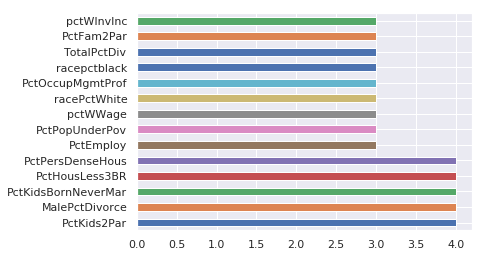

In [160]:
final_violent_features_series.value_counts().nlargest(14).plot.barh();

#### 5.4.b. Nonviolent crimes

In [161]:
final_nonviolent_features = nonviolent_features+var_features+best_35_nonv+nonv_select_rf
len(final_nonviolent_features)

164

In [162]:
final_nonviolent_features_series = pd.Series(final_nonviolent_features)

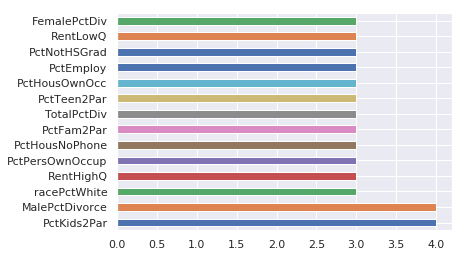

In [163]:
final_nonviolent_features_series.value_counts().nlargest(14).plot.barh();

The three most frequent features correspond in case of  both violent and nonviolent crimes, and the rest are unique features. That's why predicting the rate of violent and nonviolent crimes on the same features may lead to poor performance.

## 6. Model with parameter tuning on grid selected features

In [164]:
X_viol = X[violent_features]
X_viol.head()

,population,racepctblack,agePct12t29,agePct16t24,pctUrban,pctWWage,pctWInvInc,pctWRetire,PctEmploy,PctOccupManu,...,OwnOccHiQuart,RentLowQ,MedOwnCostPctIncNoMtg,NumInShelters,PctForeignBorn,LemasSwFTFieldOps,PolicReqPerOffic,OfficAssgnDrugUnits,PolicCars,LemasPctOfficDrugUn
0,11980,1.37,21.44,10.93,100.0,89.24,70.20,18.39,64.55,5.49,...,326900,685,14.0,11,10.66,399.692053,526.418212,26.364238,178.05298,0.0
1,23123,0.80,21.30,10.48,100.0,78.99,64.11,22.85,61.96,6.39,...,199900,467,12.5,0,8.30,399.692053,526.418212,26.364238,178.05298,0.0
2,29344,0.74,25.88,11.01,100.0,82.00,55.73,14.56,69.80,8.79,...,112000,370,11.6,16,5.00,399.692053,526.418212,26.364238,178.05298,0.0
5,140494,2.51,32.89,20.04,100.0,75.78,41.15,14.09,59.02,14.72,...,73100,215,11.7,327,1.49,399.692053,526.418212,26.364238,178.05298,0.0
6,28700,1.60,27.41,12.76,100.0,79.47,47.70,17.23,65.42,8.50,...,215500,463,12.5,0,9.19,399.692053,526.418212,26.364238,178.05298,0.0


In [165]:
X_nonv = X[nonviolent_features]
X_nonv.head()

,householdsize,agePct12t21,agePct16t24,numbUrban,pctUrban,pctWSocSec,pctWRetire,whitePerCap,NumUnderPov,PctNotHSGrad,...,PctHousNoPhone,OwnOccHiQuart,RentHighQ,NumInShelters,PctForeignBorn,LemasSwFTFieldOps,RacialMatchCommPol,PopDens,LemasPctPolicOnPatr,LemasPctOfficDrugUn
0,3.10,12.47,10.93,11980,100.0,23.62,18.39,30233,227,9.90,...,0.00,326900,1001,11,10.66,399.692053,85.482185,1845.9,86.886026,0.0
1,2.82,11.01,10.48,23123,100.0,35.50,22.85,20191,885,13.72,...,0.31,199900,672,0,8.30,399.692053,85.482185,2186.7,86.886026,0.0
2,2.43,11.36,11.01,29344,100.0,22.25,14.56,17103,1389,9.09,...,1.55,112000,520,16,5.00,399.692053,85.482185,2780.9,86.886026,0.0
5,2.45,18.09,20.04,140494,100.0,29.31,14.09,12029,23223,23.03,...,6.13,73100,349,327,1.49,399.692053,85.482185,1995.7,86.886026,0.0
6,2.60,11.17,12.76,28700,100.0,30.23,17.23,18276,1126,13.89,...,0.69,215500,824,0,9.19,399.692053,85.482185,2643.5,86.886026,0.0


In [166]:
def grid_evaluate(X_train, X_test, y_train, y_test, regressor, parameters):
    grid = GridSearchCV(regressor, parameters, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
    grid.fit(X_train, y_train)
    score = grid.best_score_
    params = grid.best_params_
    predicts_train = grid.best_estimator_.predict(X_train)
    predicts_test = grid.best_estimator_.predict(X_test)
    MAE_train = mean_absolute_error(y_train, predicts_train)
    MAE_test = mean_absolute_error(y_test, predicts_test)
    return(score, params, MAE_train, MAE_test)

In [167]:
X_viol_std = scaler.fit_transform(X_viol)
X_nonv_std = scaler.fit_transform(X_nonv)

In [168]:
X_viol_train, X_viol_test, X_nonv_train, X_nonv_test, y_nonv_train, y_nonv_test, y_viol_train, y_viol_test = train_test_split(X_viol_std, X_nonv_std, target_nonv, target_viol, test_size = 0.3, random_state = RANDOM_STATE)

### 6. a. Violent crimes

In [169]:
lasso_params = {'alpha': np.logspace(-1, 1, 5)}

In [170]:
%%time
grid_lasso_viol = grid_evaluate(X_viol_train, X_viol_test, y_viol_train, y_viol_test, lasso, lasso_params)
print(grid_lasso_viol)

(-242.10091972497105, {'alpha': 1.0}, 231.08039260482155, 228.91310938787944)
CPU times: user 148 ms, sys: 57.5 ms, total: 206 ms
Wall time: 3.47 s


In [171]:
best_lasso_viol = Lasso(alpha = 0.31622776601683794, random_state = RANDOM_STATE)

In [172]:
def plotter(X_train, X_test, y_train, y_test, regressor, title, lim_low, lim_up):
    regressor.fit(X_train, y_train)
    plt.scatter(y_train, regressor.predict(X_train))
    plt.scatter(y_test, regressor.predict(X_test))
    plt.xlim(lim_low, lim_up)
    plt.ylim(lim_low, lim_up)
    plt.title(title)

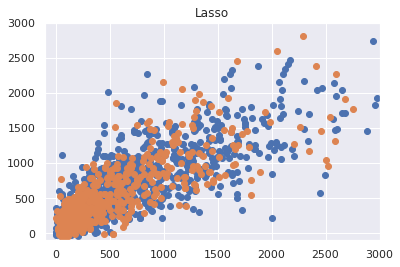

In [173]:
plotter(X_viol_train, X_viol_test, y_viol_train, y_viol_test, best_lasso_viol, 'Lasso', -100, 3000)

In [174]:
n_estimators_2 = np.arange(20, 2520, 500)
max_features = ['auto', 'sqrt']
max_depth = np.arange(10, 120, 30)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_params_2 = {'n_estimators': n_estimators_2,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_params_2

{'bootstrap': [True, False],
 'max_depth': array([ 10,  40,  70, 100]),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': array([  20,  520, 1020, 1520, 2020])}

In [175]:
random_rf_viol = RandomizedSearchCV(rf, random_params_2, scoring = 'neg_mean_absolute_error', n_iter = 100, cv = 3, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)

In [206]:
random_rf_viol.fit(X_viol_train, y_viol_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 5, 10], 'n_estimators': array([  20,  520, 1020, 1520, 2020]), 'max_depth': array([ 10,  40,  70, 100]), 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

In [208]:
random_rf_viol.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1520}

In [210]:
random_rf_viol.best_score_

-230.7546413684638

In [211]:
mean_absolute_error(y_viol_test, random_rf_viol.best_estimator_.predict(X_viol_test))

226.9430769741345

In [215]:
rf_viol_params = {'bootstrap': [False],
 'max_depth': [30, 40, 50],
 'max_features': ['sqrt'],
 'min_samples_leaf': [3, 4, 5], 
 'min_samples_split': [5,7],
 'n_estimators': [1300, 1520, 1770]}

In [216]:
%%time
grid_rf_viol = grid_evaluate(X_viol_train, X_viol_test, y_viol_train, y_viol_test, rf, rf_viol_params)
print(grid_rf_viol)

(-230.7009811604208, {'min_samples_split': 5, 'n_estimators': 1300, 'max_depth': 30, 'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 3}, 64.50459872211184, 227.08441115426606)
CPU times: user 10.4 s, sys: 106 ms, total: 10.5 s
Wall time: 9min 33s


In [176]:
best_rf_viol = RandomForestRegressor(min_samples_split = 5, n_estimators=1300, max_depth = 30, bootstrap = False, max_features = 'sqrt', min_samples_leaf = 3, random_state = RANDOM_STATE)

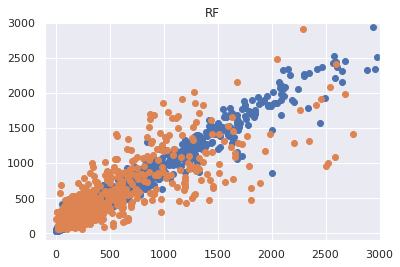

In [177]:
plotter(X_viol_train, X_viol_test, y_viol_train, y_viol_test, best_rf_viol, 'RF', -100, 3000)

### 6. b. Nonviolent crimes

In [222]:
lasso_params_1 = {'alpha': np.logspace(-2, 1, 5)}

In [223]:
%%time
grid_lasso_nonv = grid_evaluate(X_nonv_train, X_nonv_test, y_nonv_train, y_nonv_test, lasso, lasso_params_1)
print(grid_lasso_nonv)

(-1275.126554492346, {'alpha': 1.7782794100389228}, 1213.6731847307212, 1249.2224025789321)
CPU times: user 242 ms, sys: 16.3 ms, total: 259 ms
Wall time: 1.67 s


In [224]:
best_lasso_nonv = Lasso(alpha = 1.7782794100389228, random_state = RANDOM_STATE)

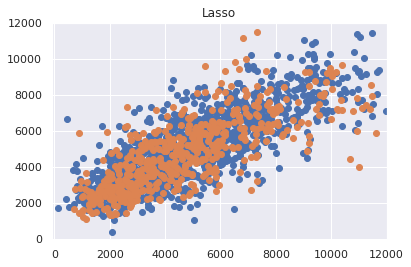

In [226]:
plotter(X_nonv_train, X_nonv_test, y_nonv_train, y_nonv_test, best_lasso_nonv, 'Lasso', -100, 12000)

In [228]:
random_rf_nonv = RandomizedSearchCV(rf, random_params_2, scoring = 'neg_mean_absolute_error', n_iter = 100, cv = 3, verbose=2, random_state=RANDOM_STATE, n_jobs = -1)

In [229]:
random_rf_nonv.fit(X_nonv_train, y_nonv_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 5, 10], 'n_estimators': array([  20,  520, 1020, 1520, 2020]), 'max_depth': array([ 10,  40,  70, 100]), 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

In [231]:
random_rf_nonv.best_score_

-1296.7216839762302

In [232]:
random_rf_nonv.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1520}

In [236]:
rf_nonv_params = {'bootstrap': [False],
 'max_depth': [5, 10, 20],
 'max_features': ['sqrt'],
 'min_samples_leaf': [3, 4, 5], 
 'min_samples_split': [10, 15],
 'n_estimators': [1300, 1520, 1770]}

In [238]:
%%time
grid_rf_nonv = grid_evaluate(X_nonv_train, X_nonv_test, y_nonv_train, y_nonv_test, rf, rf_nonv_params)
print(grid_rf_nonv)

(-1296.2162995526587, {'min_samples_split': 10, 'n_estimators': 1300, 'max_depth': 10, 'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 4}, 673.9232924723915, 1343.0470040829211)
CPU times: user 8.94 s, sys: 100 ms, total: 9.04 s
Wall time: 7min 15s


In [239]:
best_rf_nonv = RandomForestRegressor(min_samples_split = 10, n_estimators = 1300, max_depth = 10, bootstrap = False, max_features = 'sqrt', min_samples_leaf = 4, random_state = RANDOM_STATE)

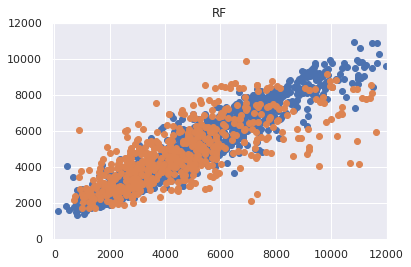

In [240]:
plotter(X_nonv_train, X_nonv_test, y_nonv_train, y_nonv_test, best_rf_nonv, 'RF', -100, 12000)

Feature selection leads to a better performance for every model, except for the nonviolent RandomForest. This exception may be caused by evaluating grid feature scores for Lasso, rather than RandomForestRegressor, but my PC ain't Usain Bolt and I ain't got a couple of spare centuries to wait. 